In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("italy-covid-daywise.csv")
data.head(10)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
5,2020-01-05,0.0,0.0,NaN
6,2020-01-06,0.0,0.0,NaN
7,2020-01-07,0.0,0.0,NaN
8,2020-01-08,0.0,0.0,NaN
9,2020-01-09,0.0,0.0,NaN


### retrieve the number of rows and columns in the data frame

In [3]:
data.shape

(248, 4)


### view statistical information for numerical columns

In [4]:
data.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


### view some basic information about the data frame like data types, and number of non-nulls

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


### create a list of columns within the data frame

In [6]:
columns_list = list(data.columns)
columns_list

['date', 'new_cases', 'new_deaths', 'new_tests']

### return only the days which had more than 1000 reported cases

In [7]:
cases_1000 = data.query('new_cases>1000')
cases_1000
#or filtered_data = data[data['reported_cases'] > 1000]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


### create positive_rate column that is equal to new_cases / new_tests

In [8]:
data['positive_rate'] = data['new_cases']/data["new_tests"]
data

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


### let's remove the positive_rate column

In [9]:
data = data.drop('positive_rate', axis = 1)
data

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


### sort to identify the days with the highest number of cases

In [10]:
data_sorted = data.sort_values('new_cases', ascending= False)
data_sorted

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
...,...,...,...,...
28,2020-01-28,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN


### check the data type of date column,then convert it into a datetime

In [11]:
date_type = data['date'].dtype
print(date_type)

object


In [12]:
data['date'] = pd.to_datetime(data['date'])
print(data['date'].dtype)

datetime64[ns]


### extract different parts (day, month, weekday, and year) of the date column into separate columns

In [41]:
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['weekday'] = data['date'].dt.weekday
data['year'] = data['date'].dt.year

data

,date,new_cases,new_deaths,new_tests,day,month,weekday,year
0,2019-12-31,0.0,0.0,NaN,31,12,1,2019
1,2020-01-01,0.0,0.0,NaN,1,1,2,2020
2,2020-01-02,0.0,0.0,NaN,2,1,3,2020
3,2020-01-03,0.0,0.0,NaN,3,1,4,2020
4,2020-01-04,0.0,0.0,NaN,4,1,5,2020
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,30,8,6,2020
244,2020-08-31,1365.0,4.0,42583.0,31,8,0,2020
245,2020-09-01,996.0,6.0,54395.0,1,9,1,2020
246,2020-09-02,975.0,8.0,NaN,2,9,2,2020


### check the overall metrics for May (i.e, the total numbers of 'new_cases', 'new_deaths', 'new_tests')

In [14]:
may_df = data.query('date.dt.month == 5')
may_df

,date,new_cases,new_deaths,new_tests,day,month,weekday,year
122,2020-05-01,1872.0,285.0,43732.0,1,5,4,2020
123,2020-05-02,1965.0,269.0,31231.0,2,5,5,2020
124,2020-05-03,1900.0,474.0,27047.0,3,5,6,2020
125,2020-05-04,1389.0,174.0,22999.0,4,5,0,2020
126,2020-05-05,1221.0,195.0,32211.0,5,5,1,2020
127,2020-05-06,1075.0,236.0,37771.0,6,5,2,2020
128,2020-05-07,1444.0,369.0,13665.0,7,5,3,2020
129,2020-05-08,1401.0,274.0,45428.0,8,5,4,2020
130,2020-05-09,1327.0,243.0,36091.0,9,5,5,2020
131,2020-05-10,1083.0,194.0,31384.0,10,5,6,2020


In [15]:
print('Total new cases in May:', may_df['new_cases'].sum())
print('Total new deaths in May:', may_df['new_deaths'].sum())
print('Total new tests in May:', may_df['new_tests'].sum())

Total new cases in May: 29073.0
Total new deaths in May: 5658.0
Total new tests in May: 1078720.0


### which day seems like have more cases?


In [16]:
max_cases_date = data.loc[data['new_cases'].idxmax(), 'date']
max_cases_date

Timestamp('2020-03-22 00:00:00')

In [17]:
print('Theday seems like have more cases is:', max_cases_date.strftime('%A, %B %d, %Y'))

Theday seems like have more cases is: Sunday, March 22, 2020


### create a new dataframe with month-wise data

In [29]:
monthly_data = data.groupby(data["date"].dt.to_period("M"))
monthly_data = monthly_data[["new_cases","new_deaths","new_tests",'day','month','weekday','year']].sum()
monthly_data


,new_cases,new_deaths,new_tests,day,month,weekday,year
date,,,,,,,
2019-12,0.0,0.0,0.0,31,12,1,2019
2020-01,3.0,0.0,0.0,496,31,93,62620
2020-02,885.0,21.0,0.0,435,58,89,58580
2020-03,100851.0,11570.0,0.0,496,93,91,62620
2020-04,101852.0,16091.0,419591.0,465,120,89,60600
2020-05,29073.0,5658.0,1078720.0,496,155,99,62620
2020-06,7772.0,1404.0,830354.0,465,180,85,60600
2020-07,6722.0,388.0,797692.0,496,217,93,62620
2020-08,21060.0,345.0,1098704.0,496,248,95,62620


### plot a line graph showing how the number of daily cases varies over time

In [34]:
import matplotlib.pyplot as plt

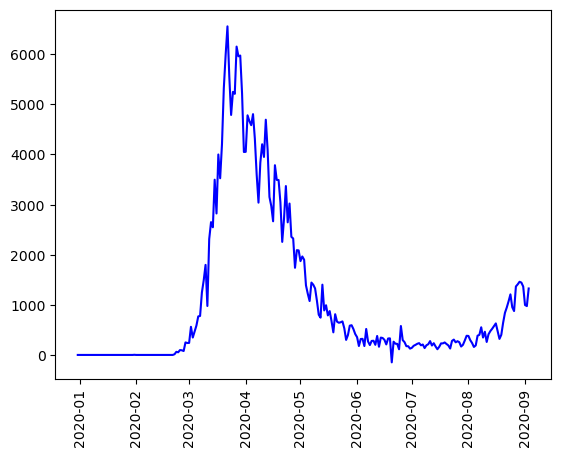

In [39]:
plt.plot(data["date"],data['new_cases'],'b-')
plt.xticks(rotation = 90)
plt.show()